In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from scipy import stats

from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [81]:
df=pd.read_csv("D:\INeuron\Full Stack data science\Coding\ML\Job_Project\Cleaned_Data.csv",index_col=0)
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  
0  0.5        0  
1  0.4        0  
2  0.1        0  
3  0.0        0  
4  0.5        0

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>,
        <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>, <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>, <Axes: >, <Axes: >]],
      dtype=object)

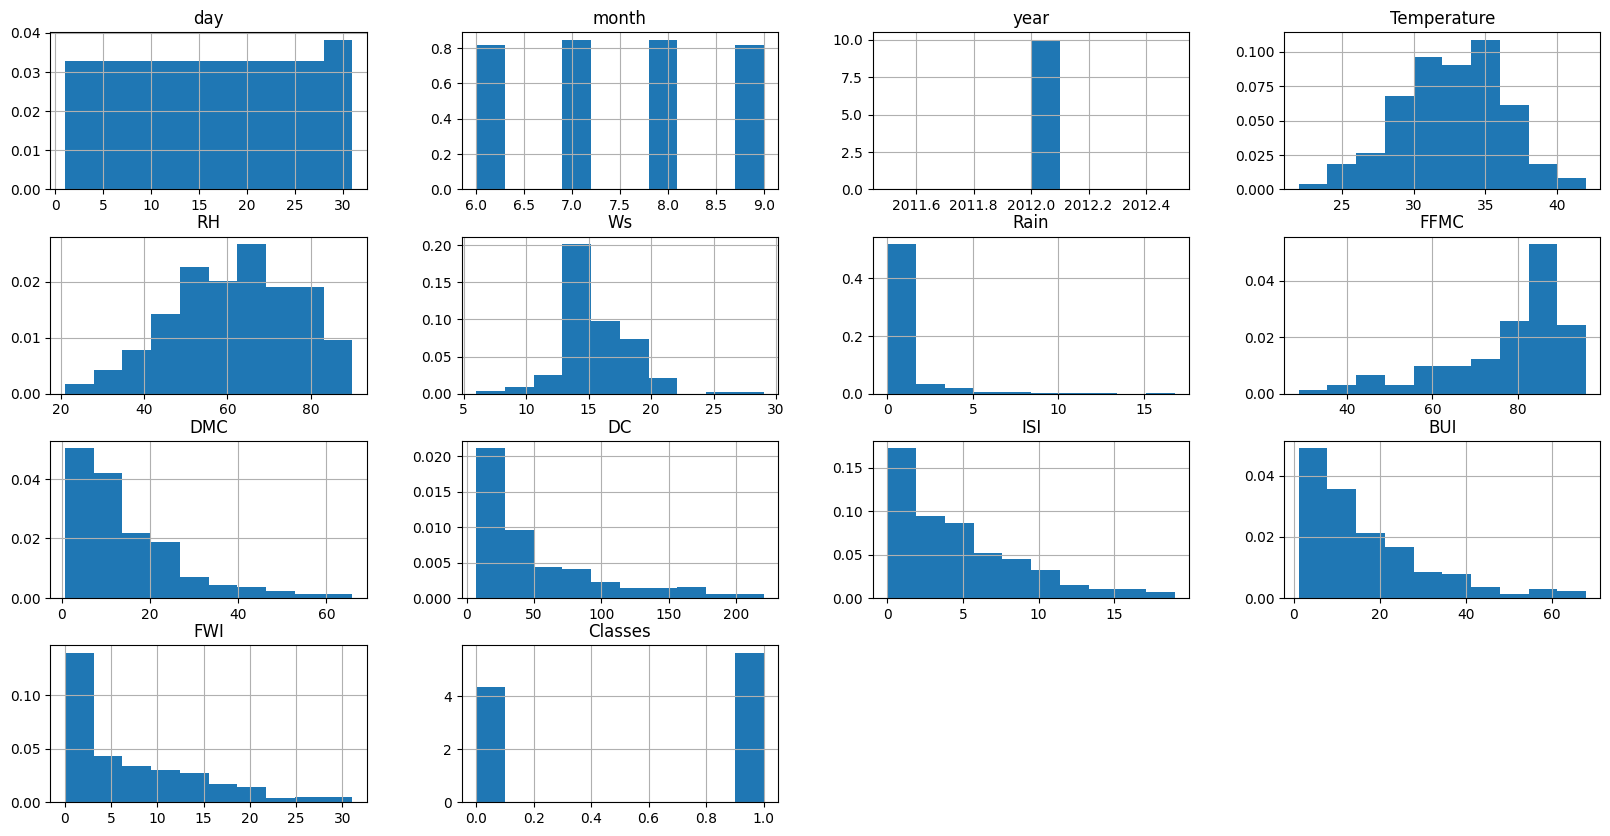

In [82]:
df.hist(density=True,figsize=(20,10))

# Observation 1: From the above plots, we can see that there are mixture of positive skews & negative skews amonth the attributes.
# Observation 2: For year plot we could see the value is contant for entire dataset. so we can remove that feature.

([<matplotlib.axis.XTick at 0x2815931c590>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

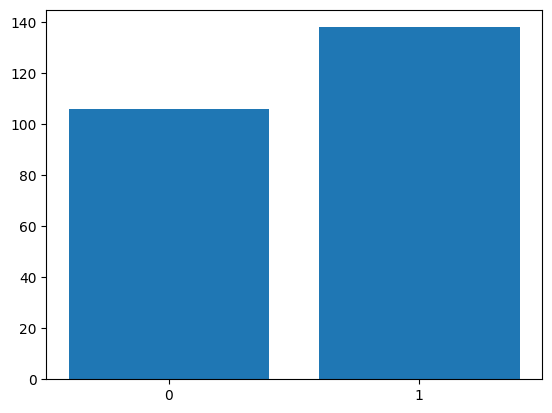

In [83]:
classes=df.groupby(['Classes'])['Classes'].count()
plt.bar(classes.index,classes)
plt.xticks([0,1])                   # 0 -> no fire   # 1-> fire

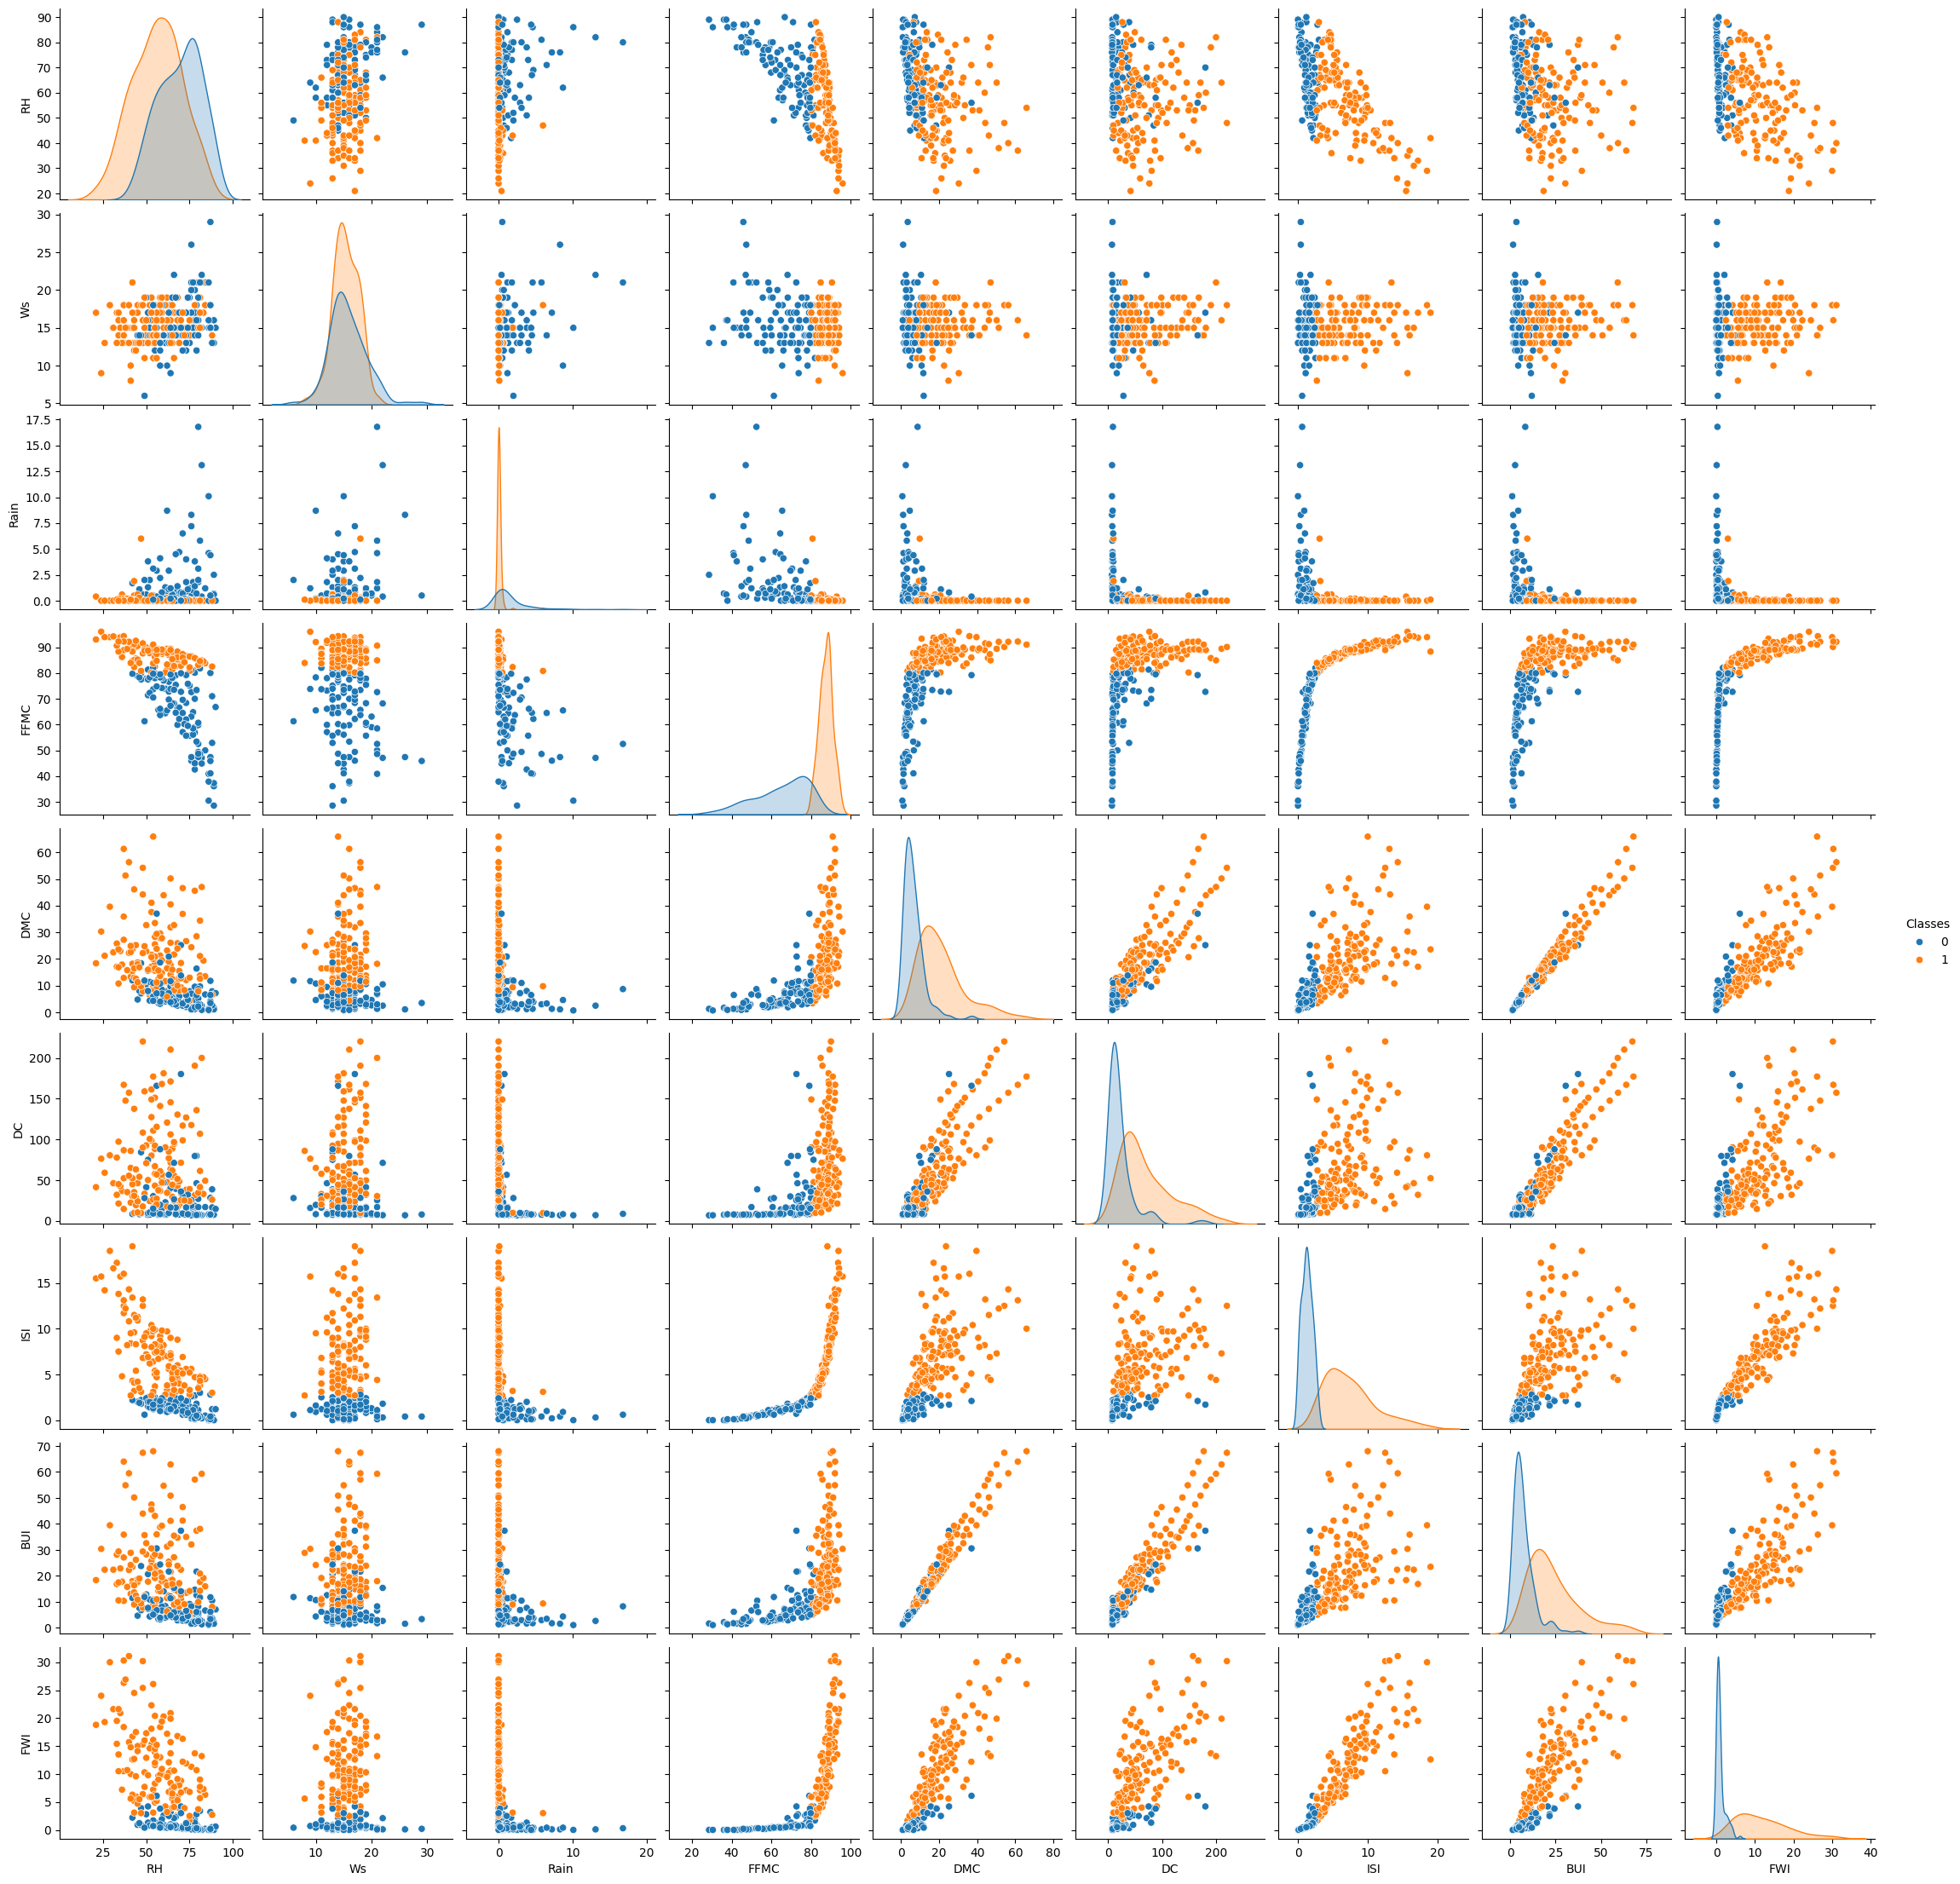

In [84]:

sns.pairplot(df.drop(columns=['day','month','year','Temperature']),hue='Classes')

In [85]:
df.corr()

day         month  year  Temperature        RH  \
day          1.000000e+00  2.232788e-17   NaN     0.095772 -0.074209   
month        2.232788e-17  1.000000e+00   NaN    -0.059017 -0.037884   
year                  NaN           NaN   NaN          NaN       NaN   
Temperature  9.577222e-02 -5.901677e-02   NaN     1.000000 -0.654443   
RH          -7.420934e-02 -3.788419e-02   NaN    -0.654443  1.000000   
Ws           4.700086e-02 -4.144673e-02   NaN    -0.278132  0.236084   
Rain        -1.122654e-01  3.532207e-02   NaN    -0.326786  0.222968   
FFMC         2.240321e-01  1.557668e-02   NaN     0.677491 -0.645658   
DMC          4.915710e-01  6.817778e-02   NaN     0.483105 -0.405133   
DC           5.279300e-01  1.276691e-01   NaN     0.370511 -0.220344   
ISI          1.777266e-01  6.168011e-02   NaN     0.607551 -0.690637   
BUI          5.172292e-01  8.582162e-02   NaN     0.455504 -0.348587   
FWI          3.502144e-01  8.170530e-02   NaN     0.566898 -0.580536   
Classes      2.017844e-01  2.233266e-02   NaN     0.518119 -0.435023   

                   Ws      Rain      FFMC       DMC        DC       ISI  \
day          0.047001 -0.112265  0.224032  0.491571  0.527930  0.177727   
month       -0.041447  0.035322  0.015577  0.068178  0.127669  0.061680   
year              NaN       NaN       NaN       NaN       NaN       NaN   
Temperature -0.278132 -0.326786  0.677491  0.483105  0.370511  0.607551   
RH           0.236084  0.222968 -0.645658 -0.405133 -0.220344 -0.690637   
Ws           1.000000  0.170169 -0.163255 -0.001246  0.076253  0.015248   
Rain         0.170169  1.000000 -0.544045 -0.288548 -0.296808 -0.347105   
FFMC        -0.163255 -0.544045  1.000000  0.602391  0.503919  0.739730   
DMC         -0.001246 -0.288548  0.602391  1.000000  0.875362  0.674499   
DC           0.076253 -0.296808  0.503919  0.875362  1.000000  0.498926   
ISI          0.015248 -0.347105  0.739730  0.674499  0.498926  1.000000   
BUI          0.029756 -0.299171  0.589652  0.982073  0.941906  0.635891   
FWI          0.034005 -0.324762  0.691455  0.875161  0.736990  0.919486   
Classes     -0.066529 -0.379449  0.770114  0.584188  0.507132  0.735511   

                  BUI       FWI   Classes  
day          0.517229  0.350214  0.201784  
month        0.085822  0.081705  0.022333  
year              NaN       NaN       NaN  
Temperature  0.455504  0.566898  0.518119  
RH          -0.348587 -0.580536 -0.435023  
Ws           0.029756  0.034005 -0.066529  
Rain        -0.299171 -0.324762 -0.379449  
FFMC         0.589652  0.691455  0.770114  
DMC          0.982073  0.875161  0.584188  
DC           0.941906  0.736990  0.507132  
ISI          0.635891  0.919486  0.735511  
BUI          1.000000  0.856399  0.583882  
FWI          0.856399  1.000000  0.719437  
Classes      0.583882  0.719437  1.000000

<Axes: >

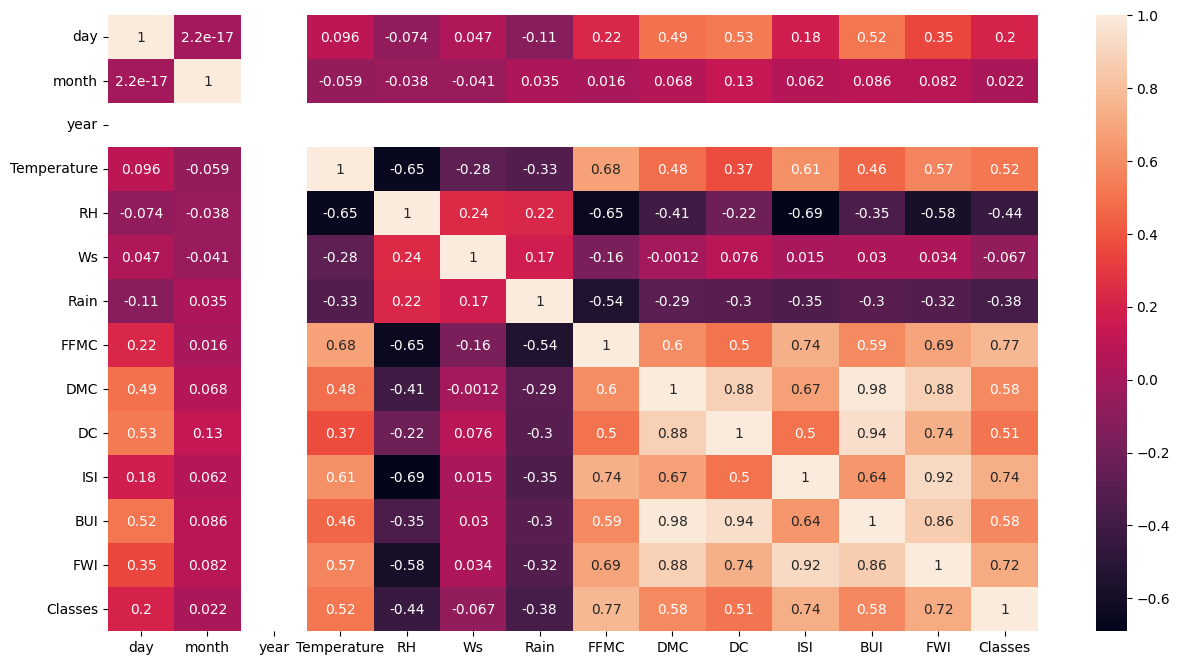

In [86]:
fig, ax =plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,ax=ax)

# Observation 1: From the above heat map, we could see there is a huge collinearity in BUI with the features DMC & DC. So we can remove those 2 features as it wont give any addition information.

# Observation 2: Year feature has no collinearity as it has a constant value over the entire dataset. So we can remove those feature as well.

In [87]:
#Need to check the outliers
df_temp=df.drop(columns=['year'],axis=1)
'''
for feature in df_temp.columns:
    plt.figure(figsize=(8,2))
    sns.boxplot(df[feature],orient='h')
    plt.title(feature)
'''

"\nfor feature in df_temp.columns:\n    plt.figure(figsize=(8,2))\n    sns.boxplot(df[feature],orient='h')\n    plt.title(feature)\n"

<Axes: >

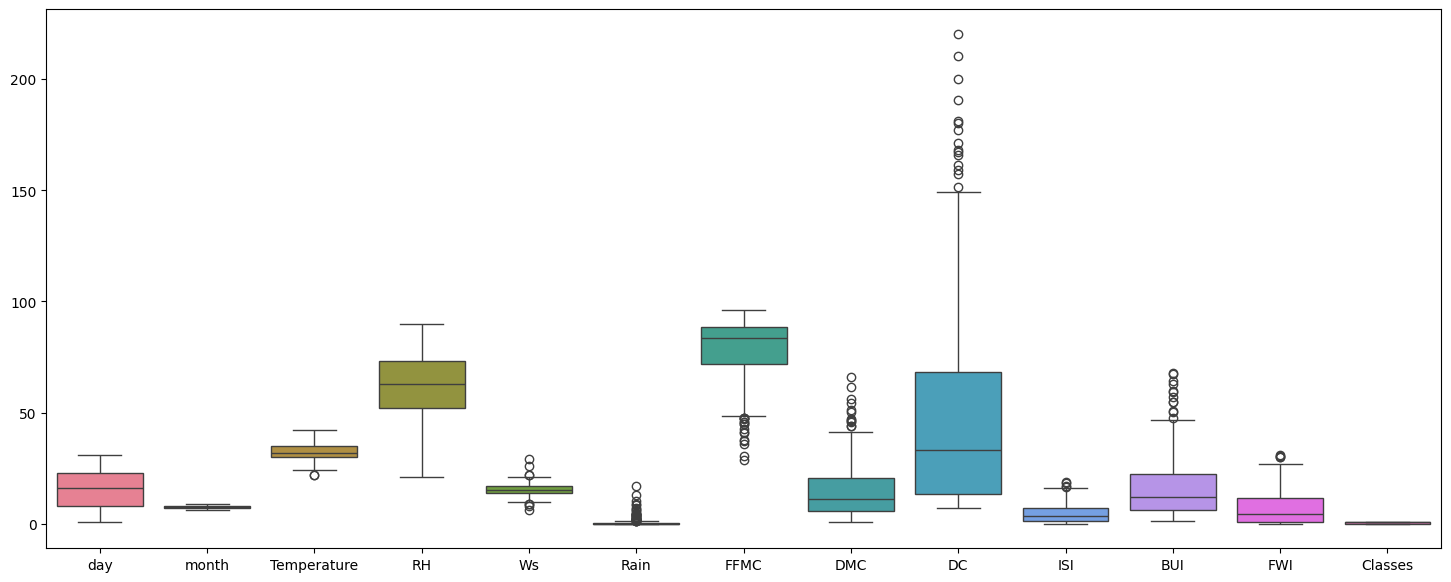

In [88]:
plt.figure(figsize=(18,7))
sns.boxplot(data=df_temp)

# Observation: We could see most of the features are having the outliers in their data.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

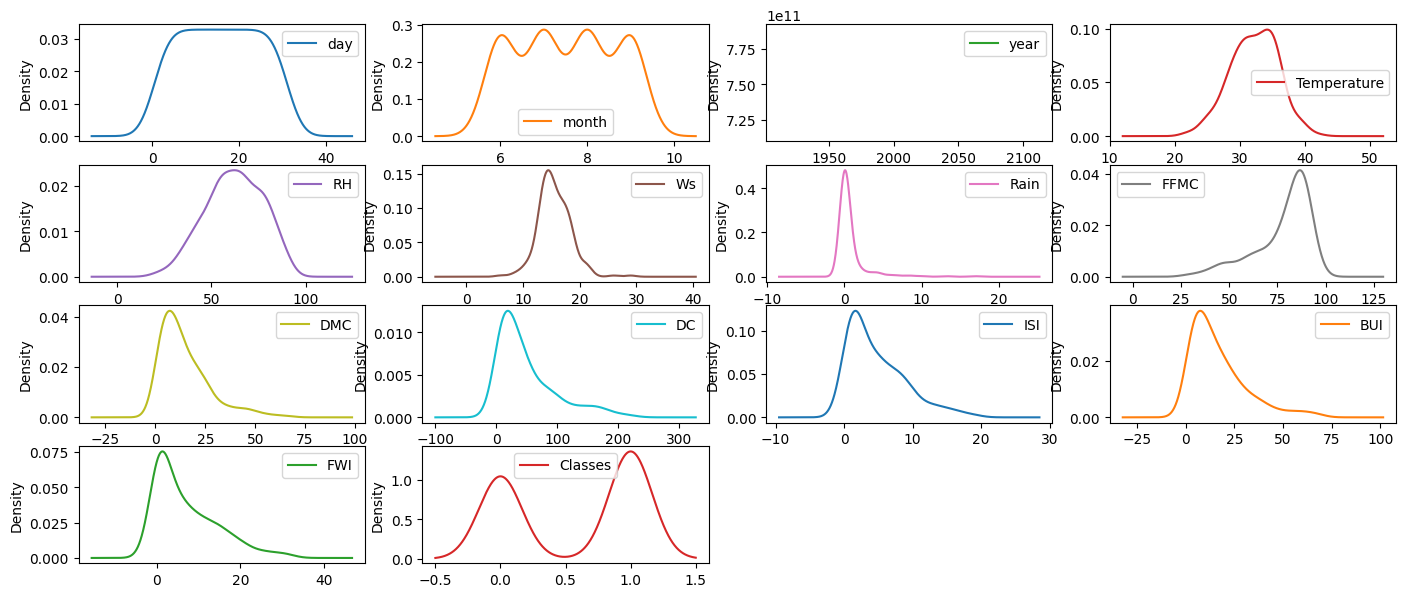

In [89]:
fig,ax = plt.subplots(figsize=(17,7))
df.plot(kind='density',subplots=True,layout=(4,4),sharex=False,sharey=False,ax=ax)

In [90]:
def log_trans(df,var):
    t=np.log(df[var])
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.histplot(df[var],kde='True')
    plt.title('Before Log Transformer')
    plt.subplot(122)
    sns.histplot(t,kde=True)
    plt.title('After Log Transformer')

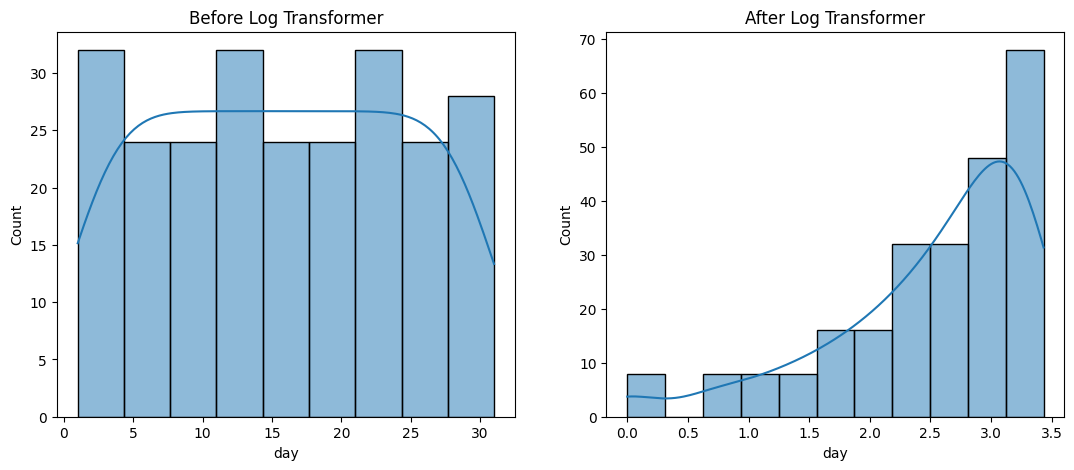

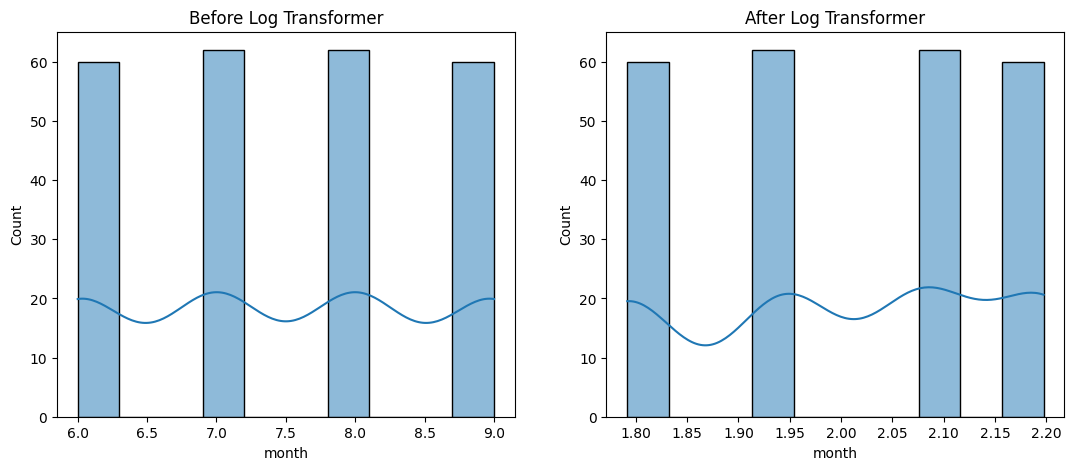

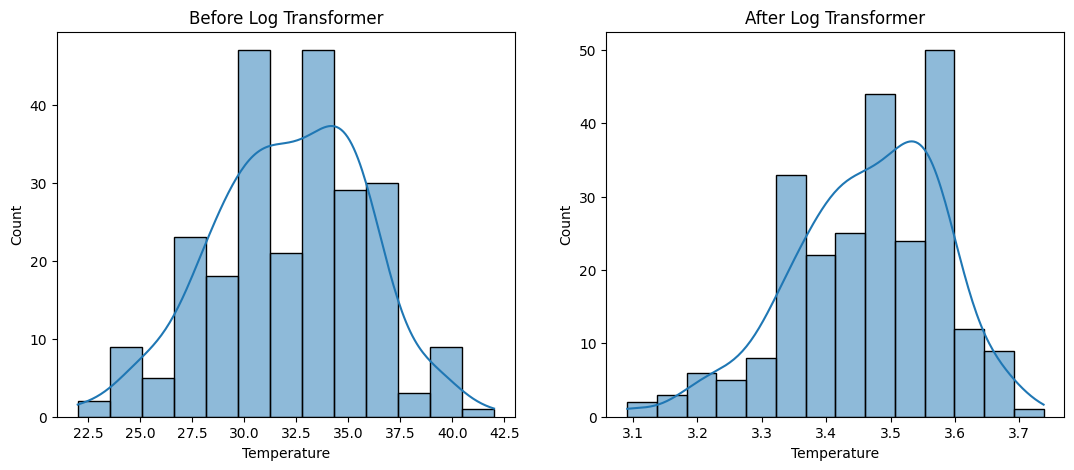

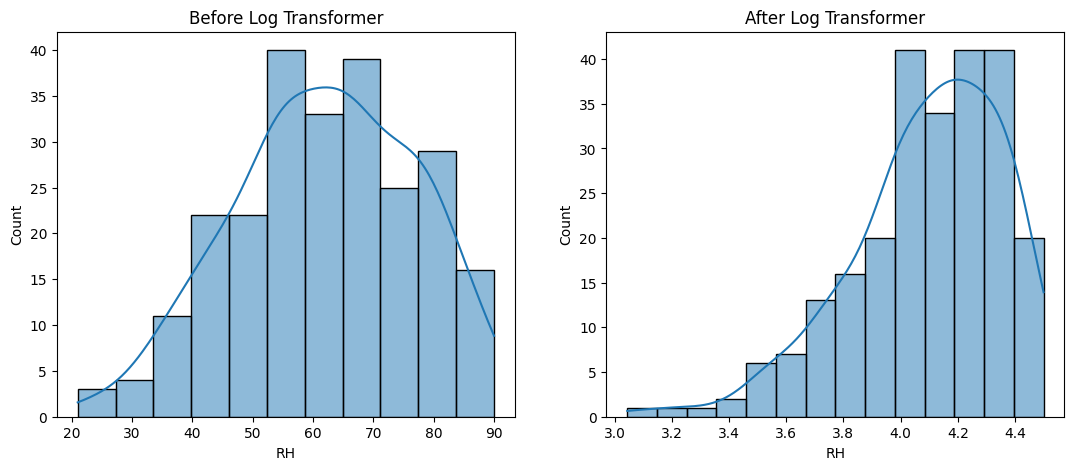

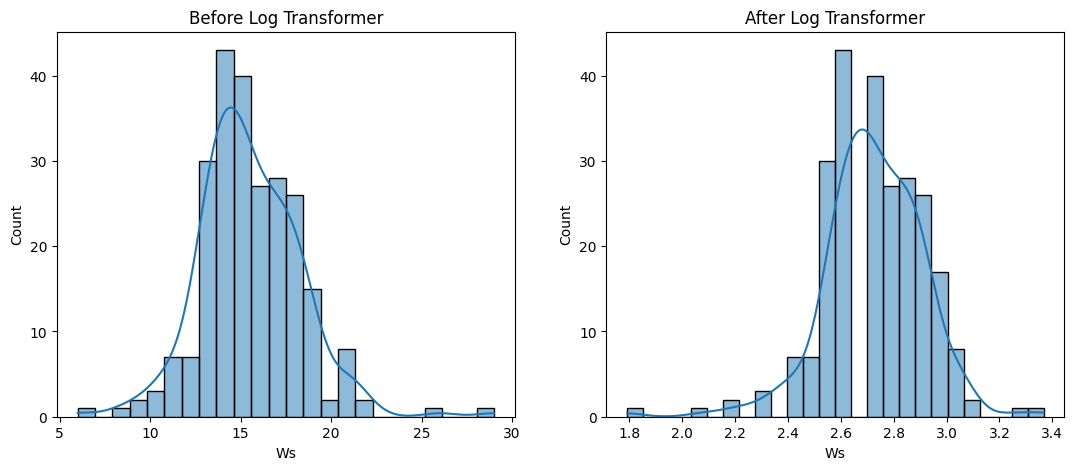

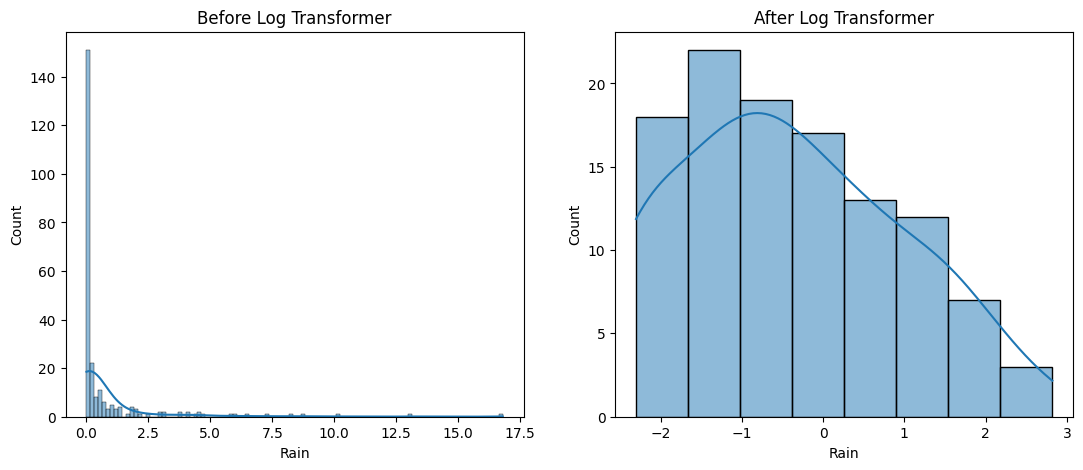

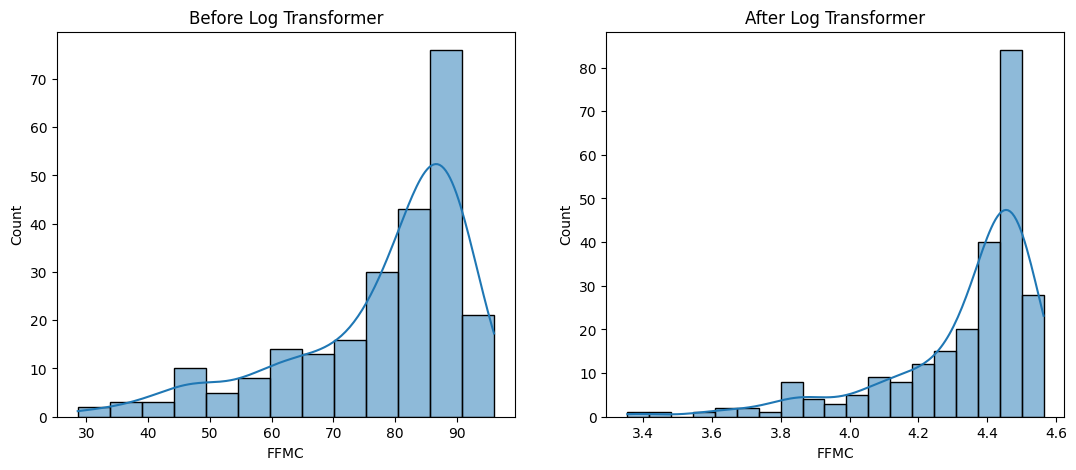

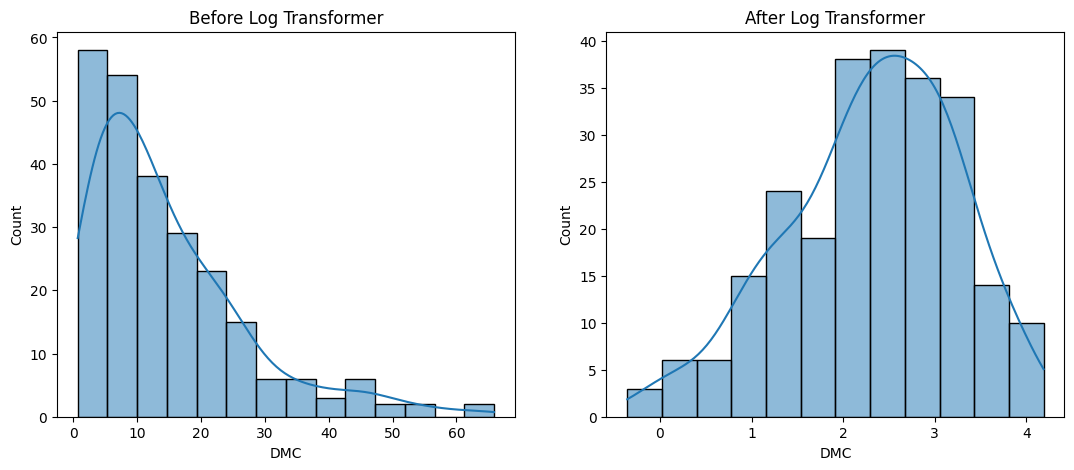

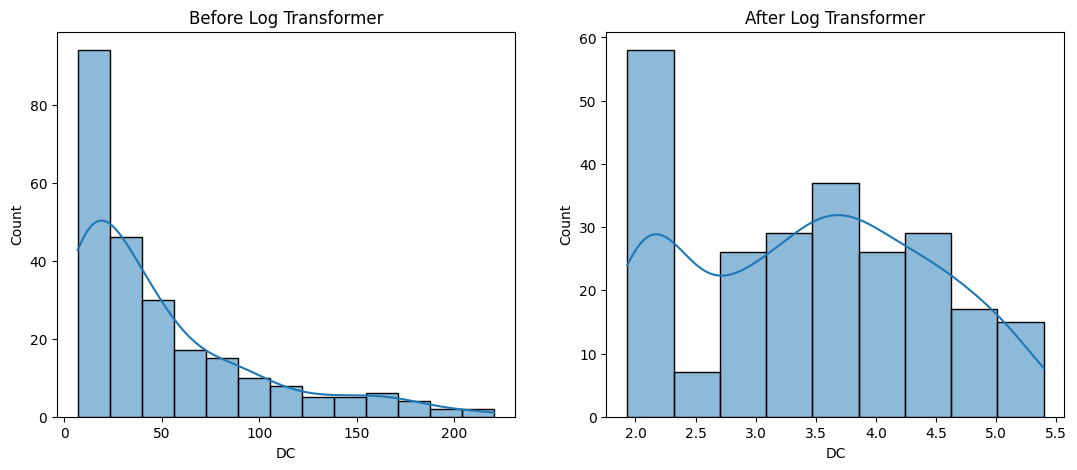

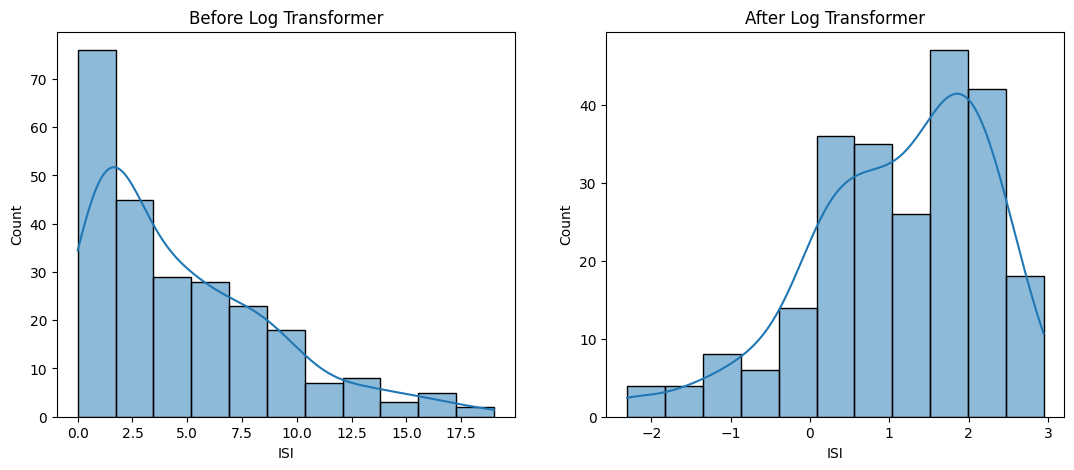

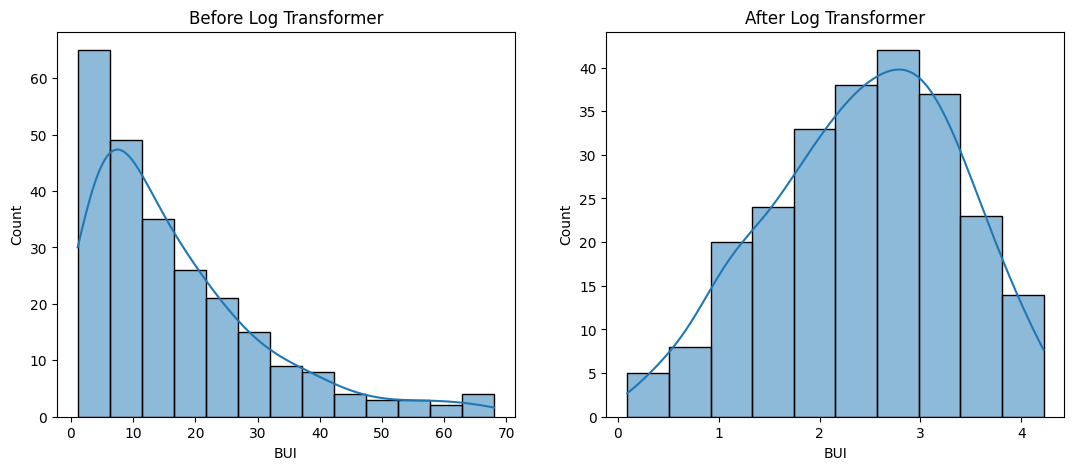

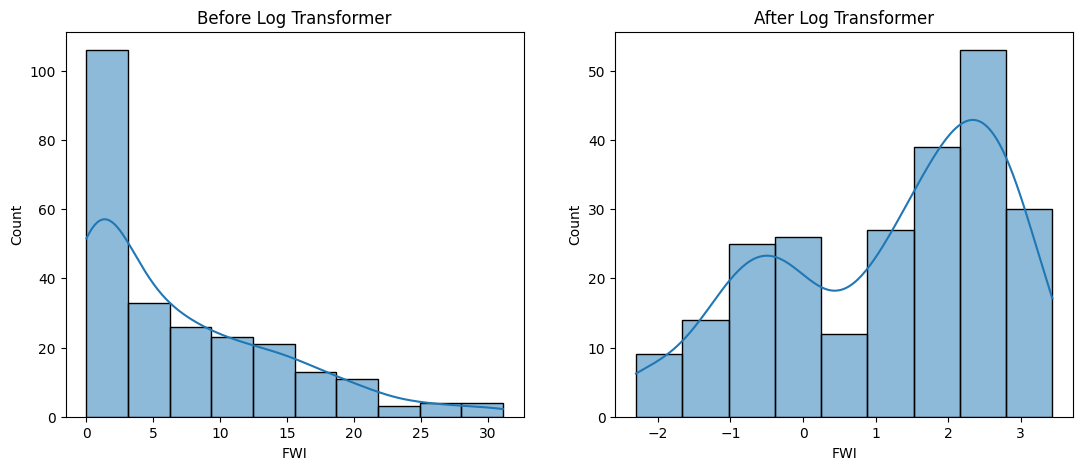

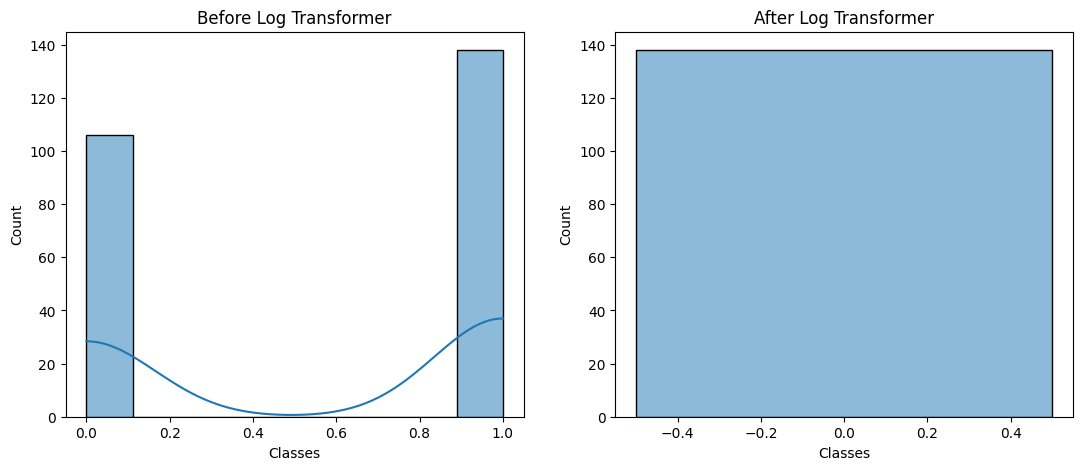

In [91]:
for feature in df_temp.columns:
    log_trans(df,feature)

# Observation : We can see some of the skewness were removed after the log function tranformer

In [92]:
def qq_plot(df,var):
    t=np.log(df[var])
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.histplot(df[var],kde='True')
    plt.title('PDF')
    plt.subplot(122)
    stats.probplot(df[var],dist='norm',plot=plt)
    plt.title('QQ Plot')

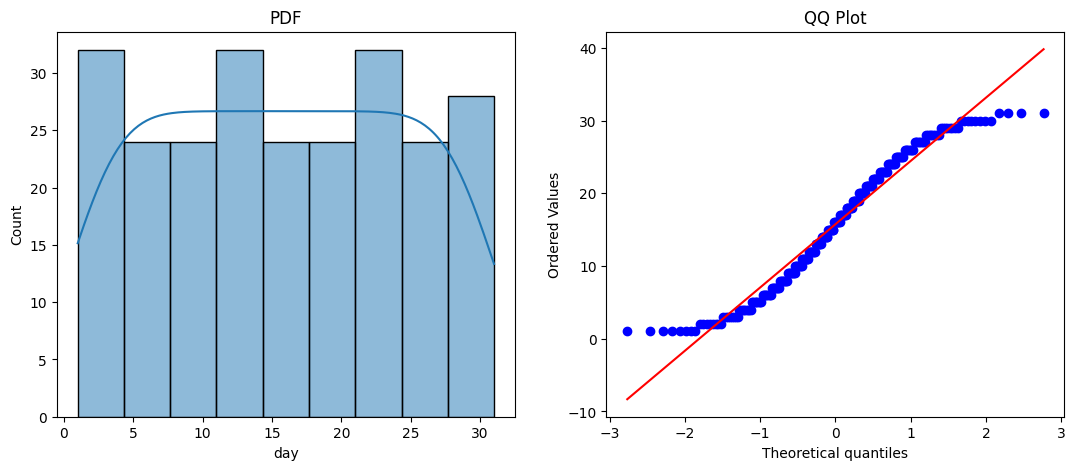

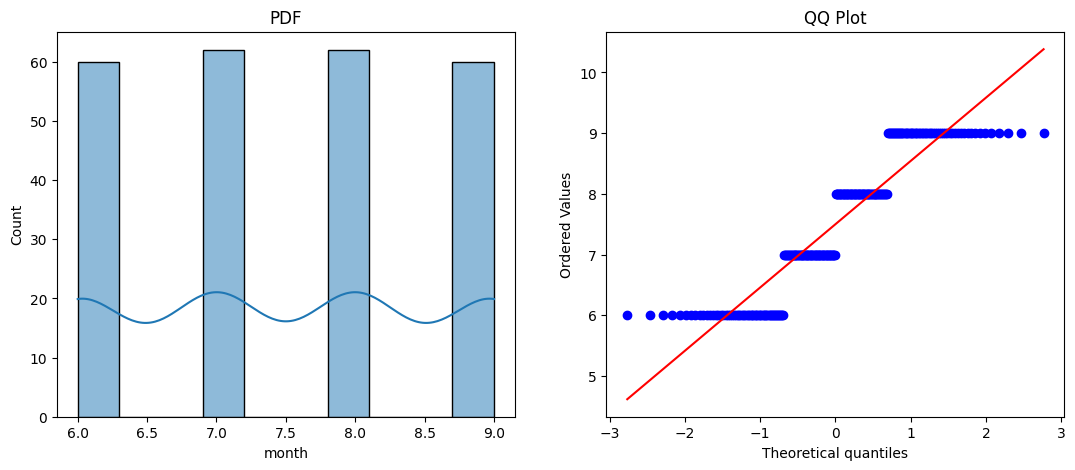

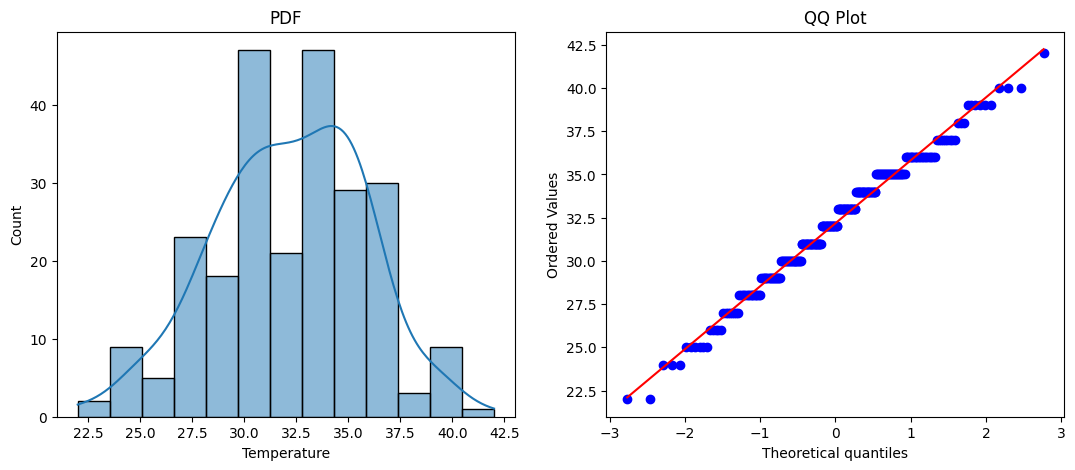

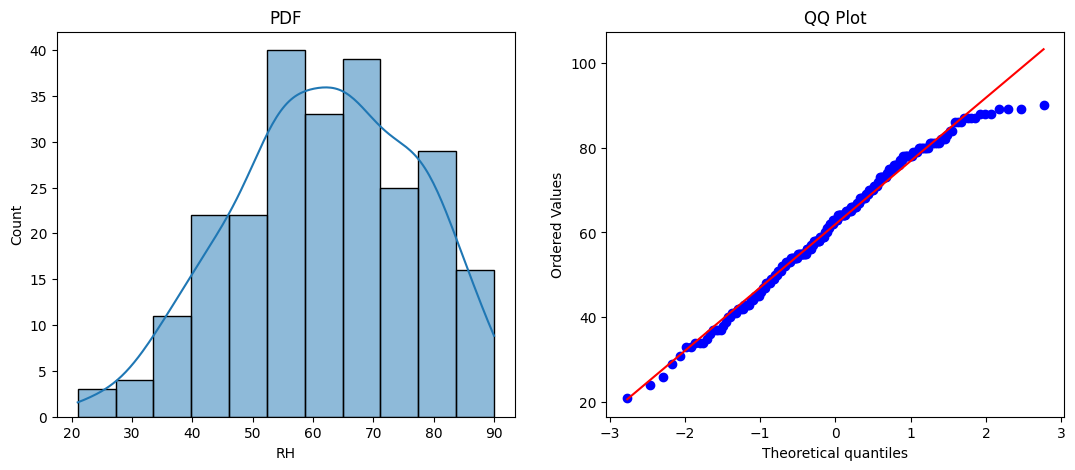

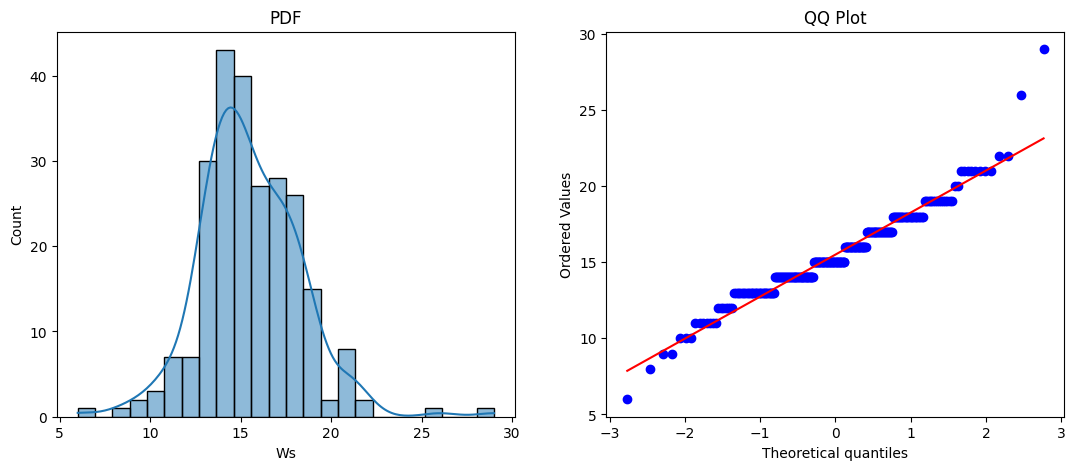

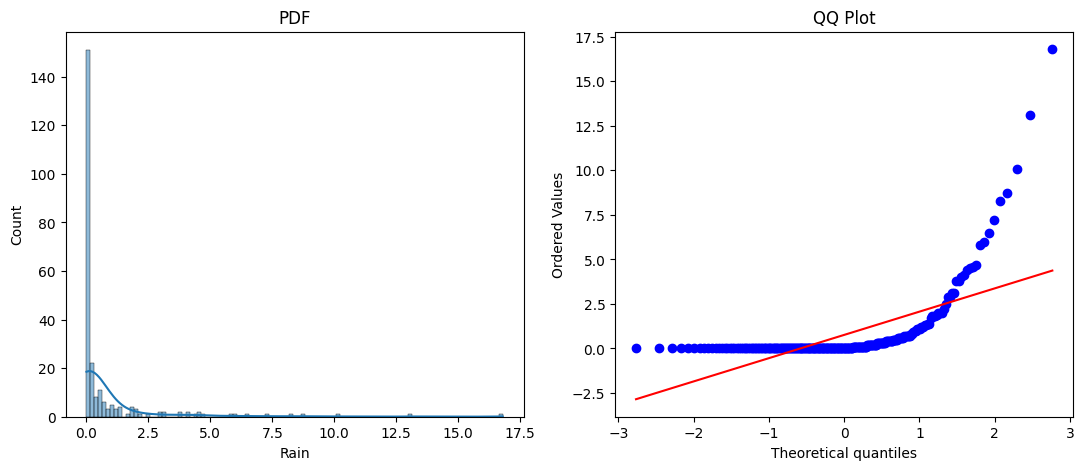

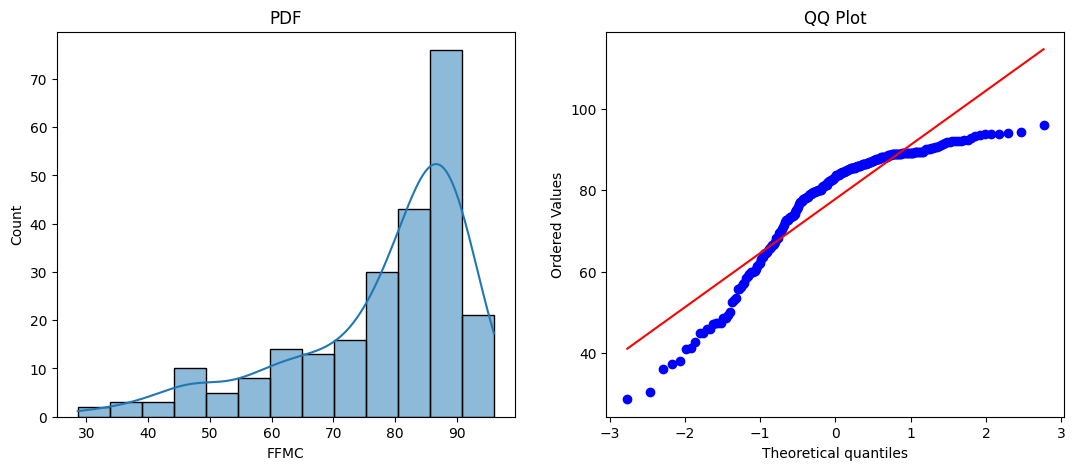

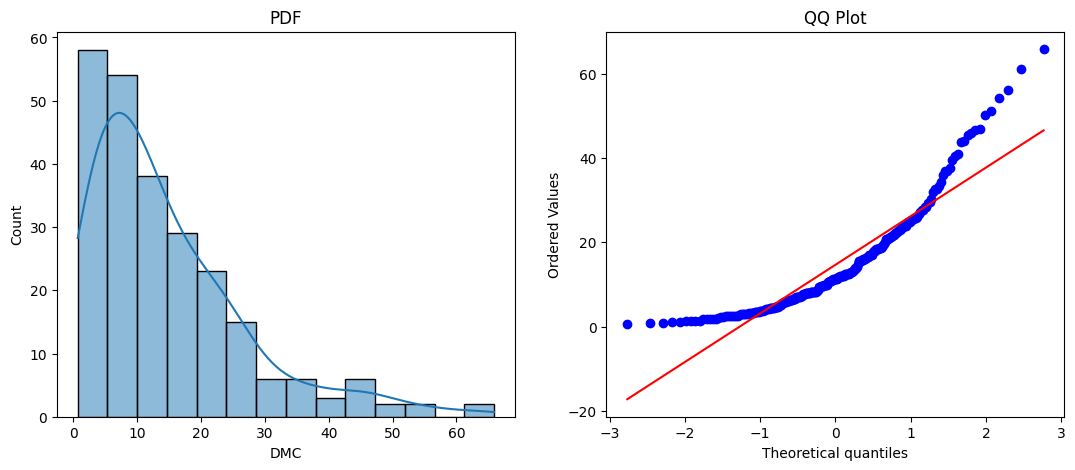

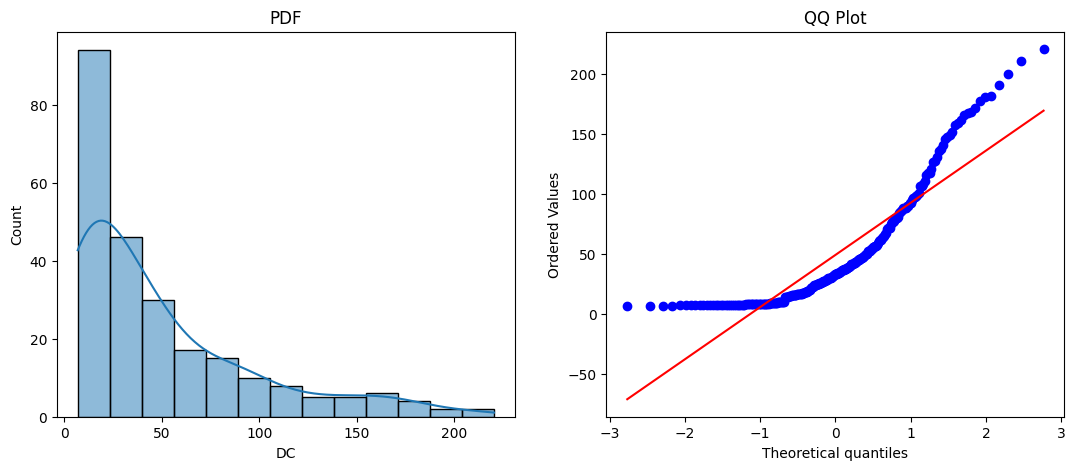

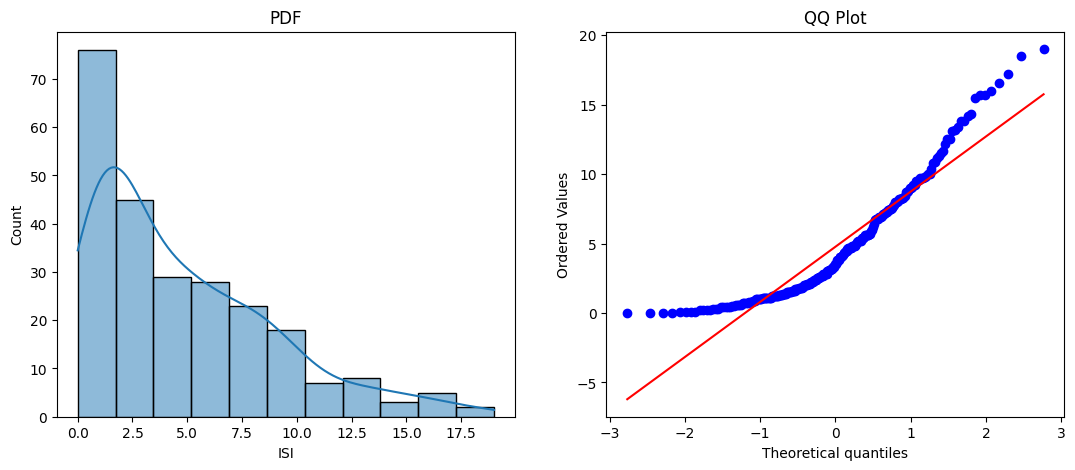

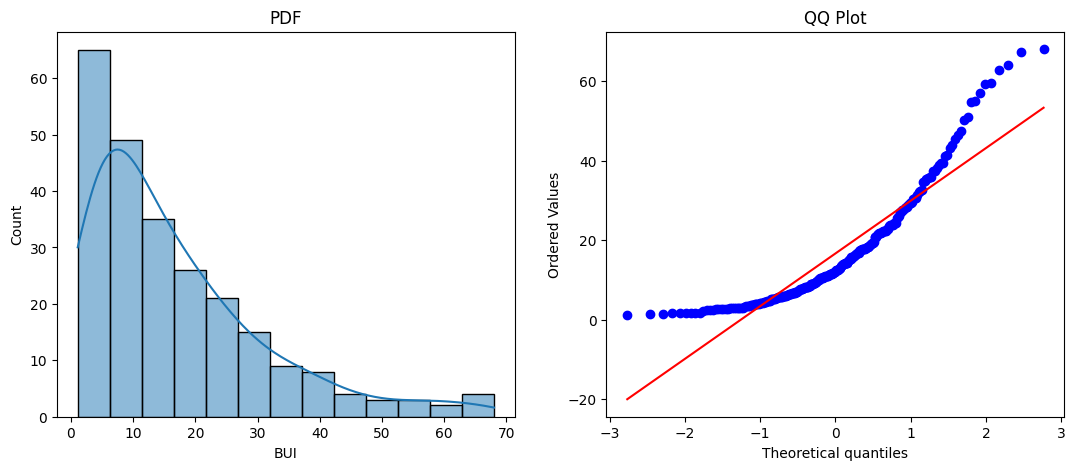

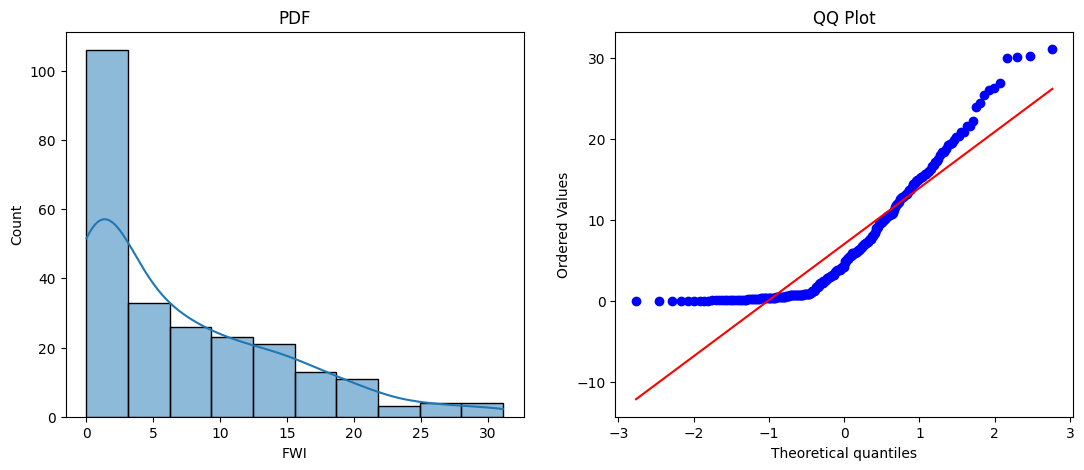

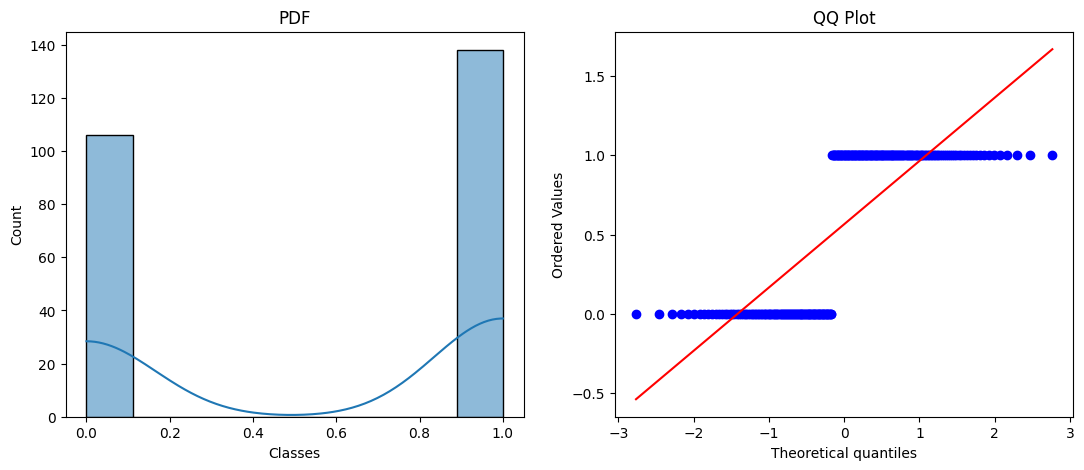

In [93]:
for feature in df_temp.columns:
    qq_plot(df,feature)

In [94]:
def power_transformer(df,var):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('Before Power Transformer')
    plt.subplot(122)
    p1=PowerTransformer().fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After Power Transformer')

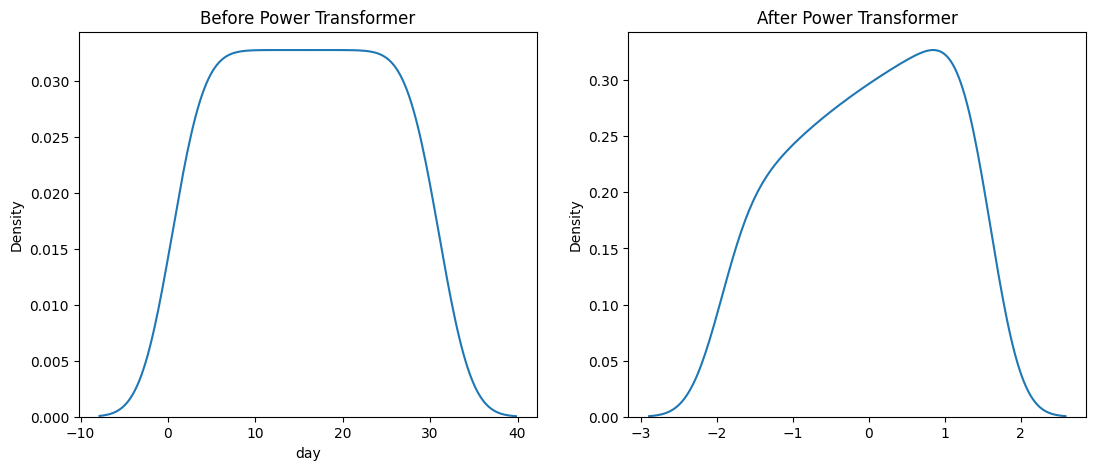

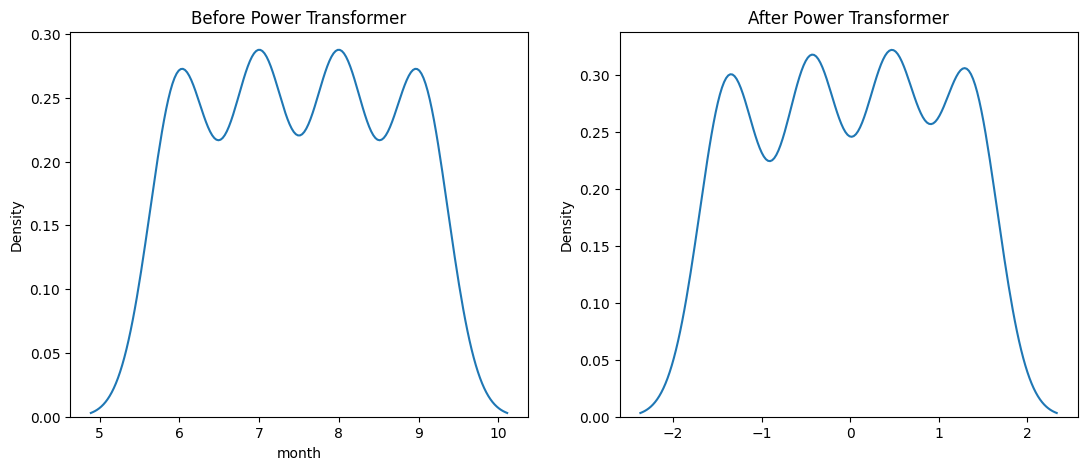

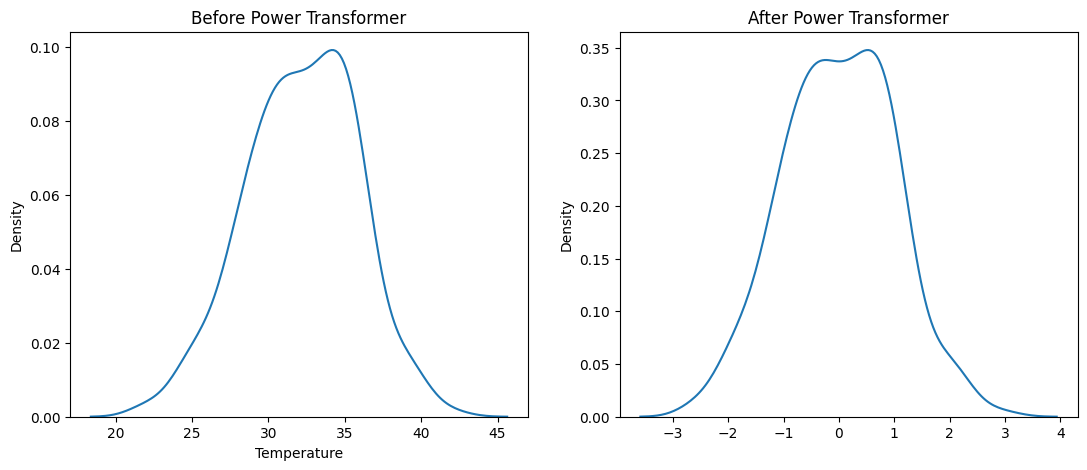

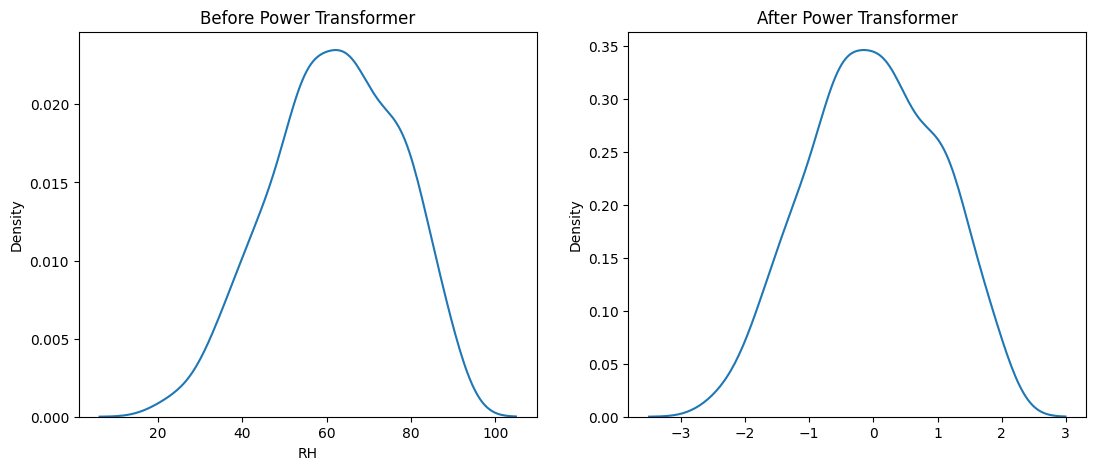

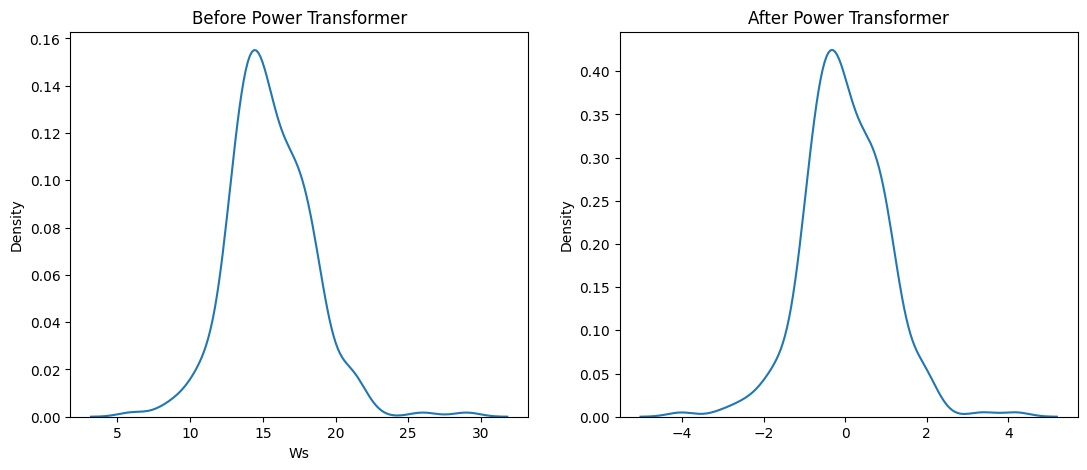

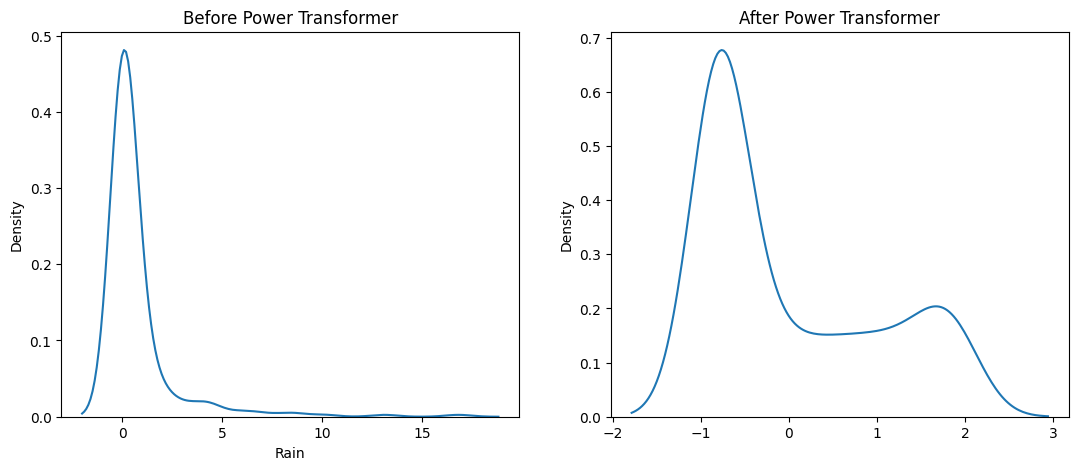

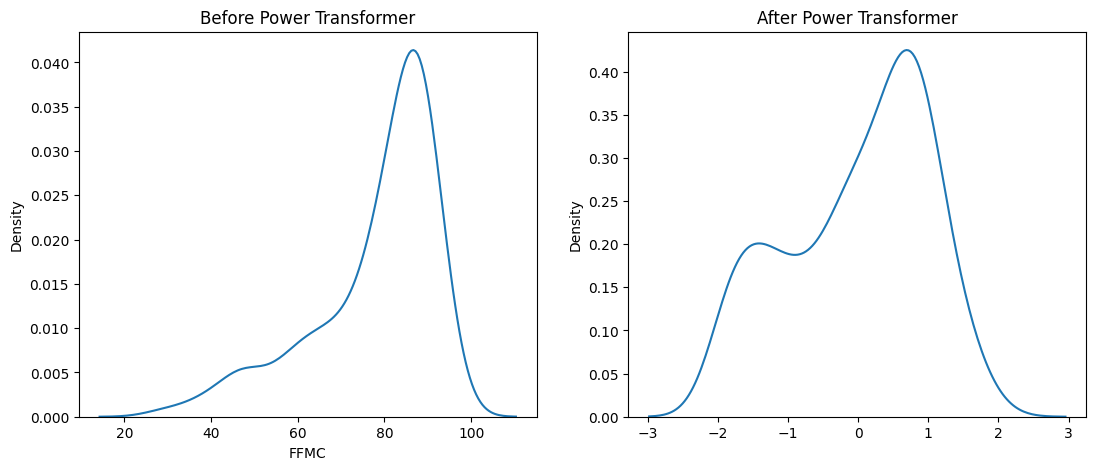

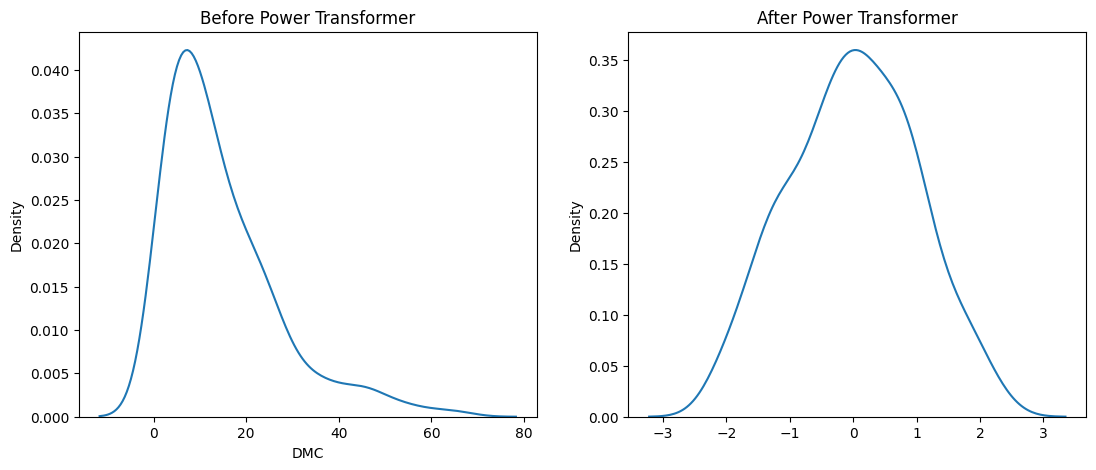

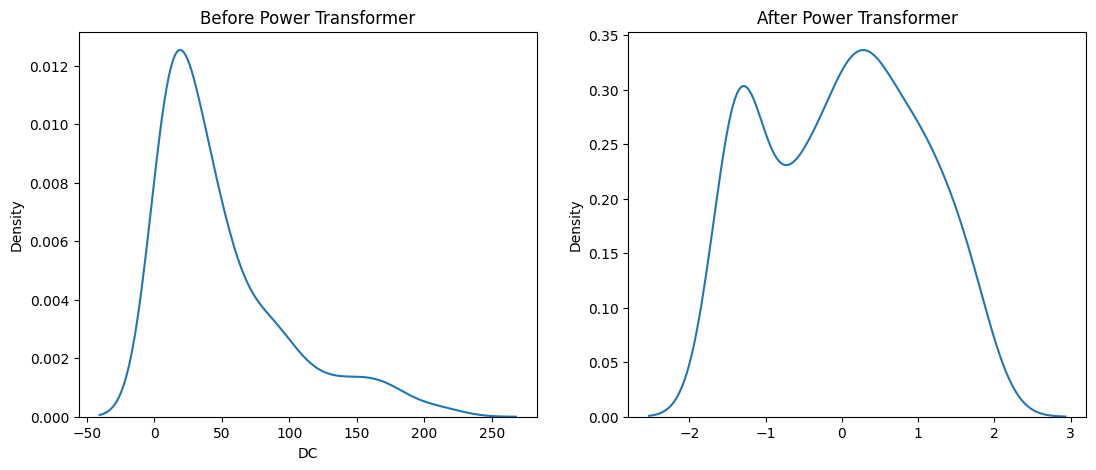

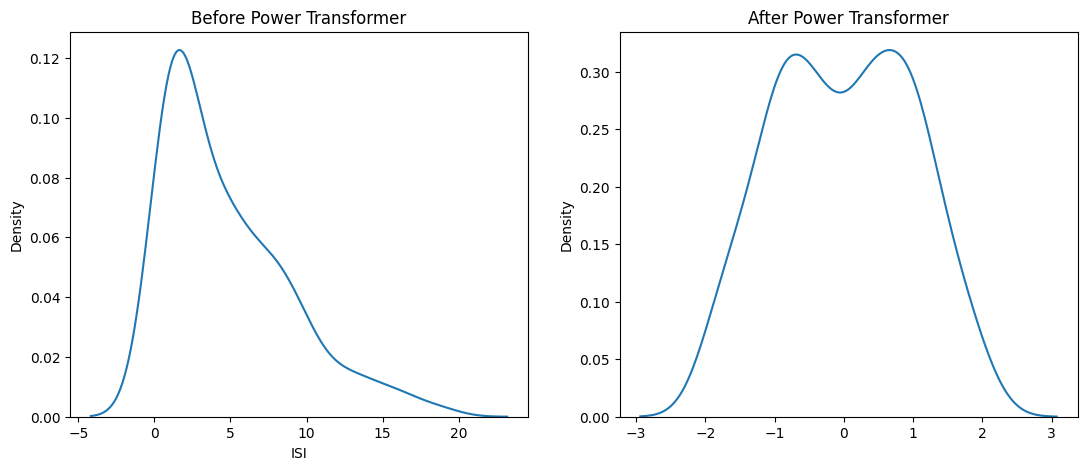

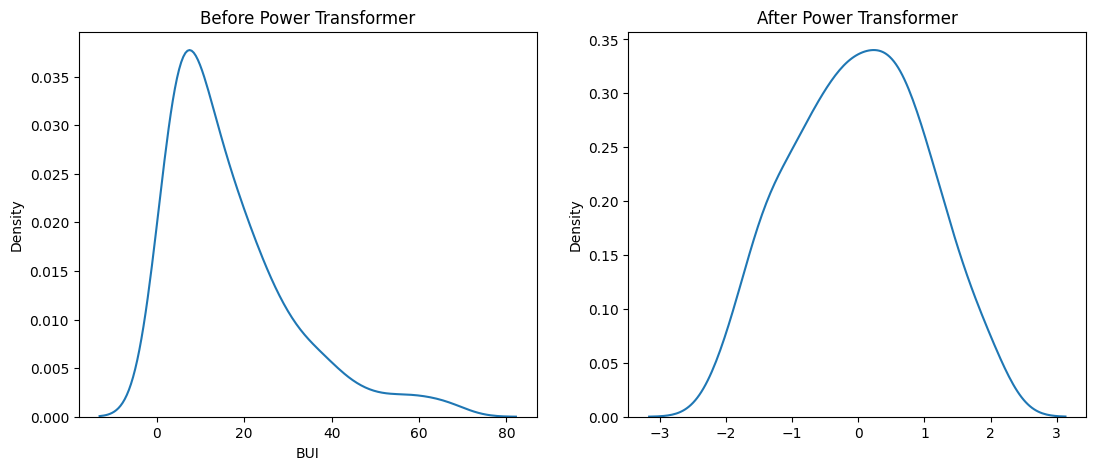

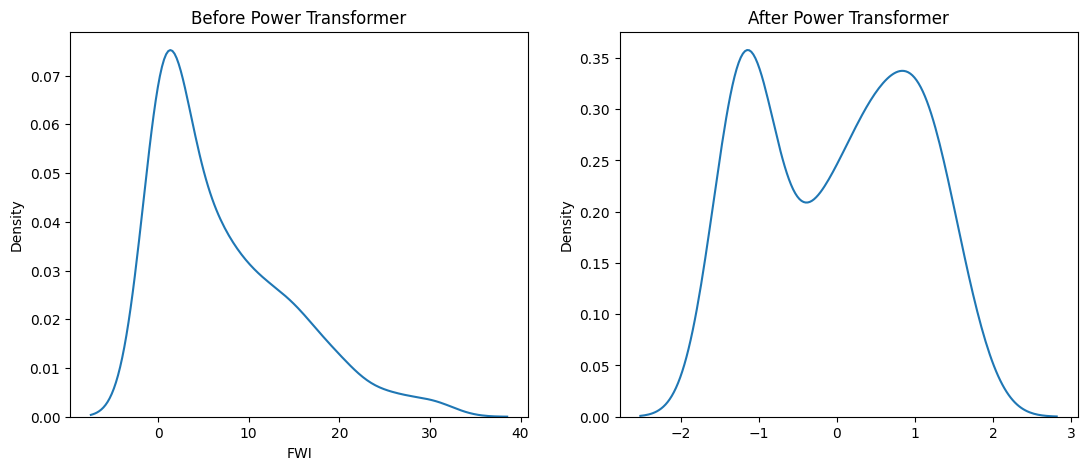

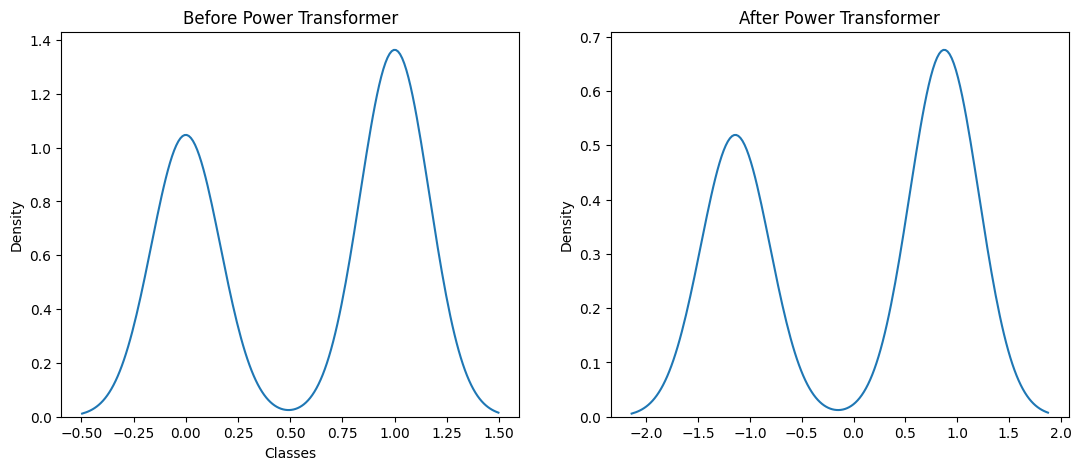

In [95]:
for feature in df_temp.columns:
    power_transformer(df,feature)

# Observation: From the tranformation graph we could see that the log tranformer has done the better transformation

<BarContainer object of 173 artists>

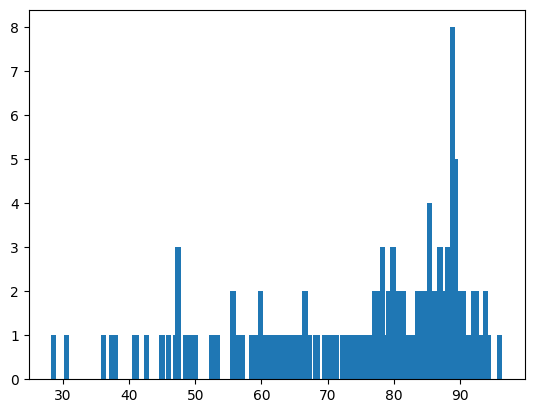

In [96]:
FFMC_group=df.groupby(['FFMC'])['FFMC'].count()
plt.bar(FFMC_group.index,FFMC_group)

<BarContainer object of 198 artists>

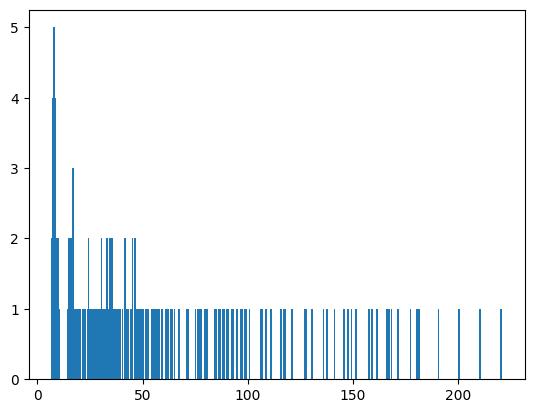

In [97]:
DC_group=df.groupby(['DC'])['DC'].count()
plt.bar(DC_group.index,DC_group)

# Observation : Upsamppling/ Downsampling is required

# Fine now will try to get some insights from the analysis

# Q1 - What is the min Temperature & max Temperture ?

# Q2 - Which month is the hottest one ?

# Q3 - Which month sees the most Rain ? 

# Q4 - which month has most no. of fire days recorded ?

In [98]:
df['Temperature'].min()

22

In [99]:
df['Temperature'].max()

42

In [100]:
df.groupby('month')['Temperature'].sum()

month
6    1848
7    2049
8    2191
9    1762
Name: Temperature, dtype: int64

In [101]:
df.groupby('month')['Rain'].sum()

month
6    58.5
7    28.0
8    27.8
9    71.3
Name: Rain, dtype: float64

In [102]:
df.groupby(['month','Classes'])['Classes'].count()

month  Classes
6      0          35
       1          25
7      0          23
       1          39
8      0          11
       1          51
9      0          37
       1          23
Name: Classes, dtype: int64

# Answer

# Q1 - What is the min Temperature & max Temperture ?
    Min -> 22 Max -> 42

# Q2 - Which month is the hottest one ?
    8 -> August Month

# Q3 - Which month sees the most Rain ? 
    9 -> September Month


# Q4 - which month has most no. of fire records recorded ?
    8 -> August Month has recorded 51 times as "fired"

In [103]:
df_temp

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
0      1      6           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5   
1      2      6           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2      3      6           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3      4      6           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
4      5      6           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5   
..   ...    ...          ...  ..  ..   ...   ...   ...   ...  ...   ...  ...   
241   26      9           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5   
242   27      9           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0   
243   28      9           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2   
244   29      9           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7   
245   30      9           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5   

     Classes  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
241        1  
242        0  
243        0  
244        0  
245        0  

[244 rows x 13 columns]

<Axes: >

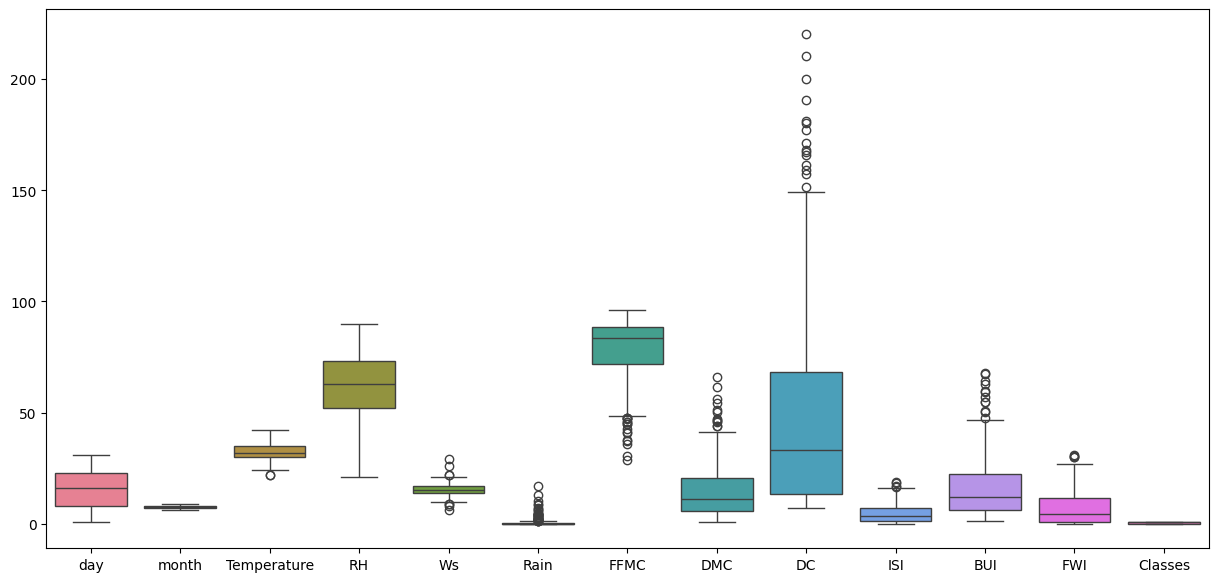

In [104]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_temp,ax=ax)

In [105]:
df2=df_temp.copy()

<Axes: >

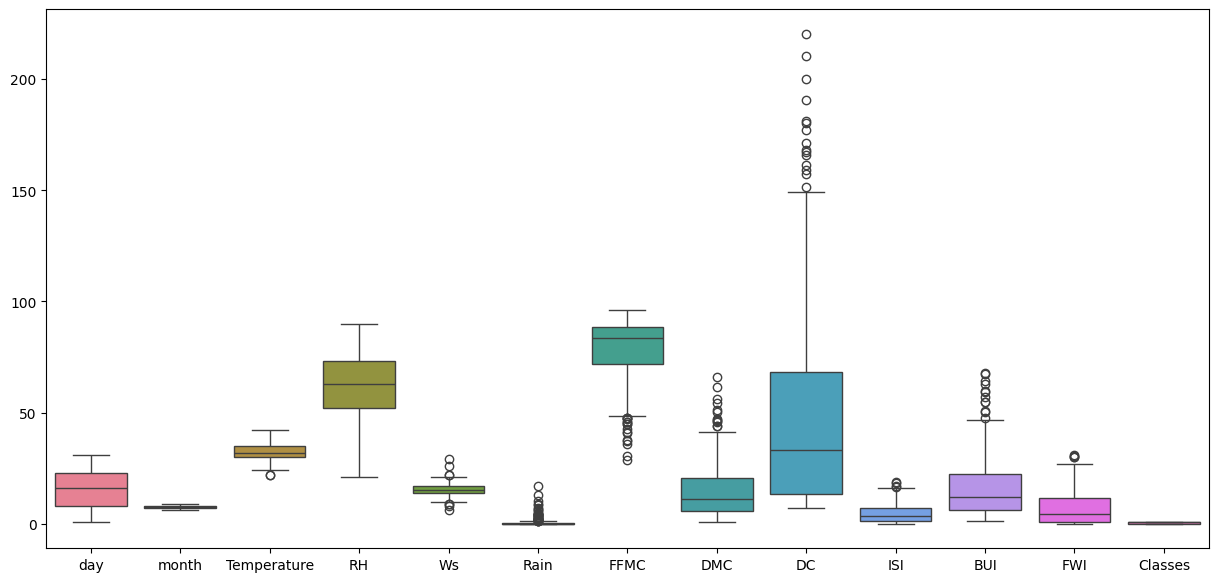

In [106]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df2,ax=ax)

In [107]:
df2.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [108]:
df2=df_temp.copy()
df2.describe()

day       month  Temperature          RH          Ws  \
count  244.000000  244.000000   244.000000  244.000000  244.000000   
mean    15.754098    7.500000    32.172131   61.938525   15.504098   
std      8.825059    1.112961     3.633843   14.884200    2.810178   
min      1.000000    6.000000    22.000000   21.000000    6.000000   
25%      8.000000    7.000000    30.000000   52.000000   14.000000   
50%     16.000000    7.500000    32.000000   63.000000   15.000000   
75%     23.000000    8.000000    35.000000   73.250000   17.000000   
max     31.000000    9.000000    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288484    4.774180   16.664754   
std      1.999406   14.337571   12.368039   47.619393    4.175318   14.204824   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.075000    5.800000   13.275000    1.400000    6.000000   
50%      0.000000   83.500000   11.300000   33.100000    3.500000   12.250000   
75%      0.500000   88.300000   20.750000   68.150000    7.300000   22.525000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI     Classes  
count  244.000000  244.000000  
mean     7.049590    0.565574  
std      7.428554    0.496700  
min      0.000000    0.000000  
25%      0.700000    0.000000  
50%      4.450000    1.000000  
75%     11.375000    1.000000  
max     31.100000    1.000000

In [109]:
df2=df_temp.copy()

def Outliers(df,feature):
    percentile_25=df[feature].quantile(0.25)
    percentile_75=df[feature].quantile(0.75)
    print("percentile_25: ",percentile_25)
    print("percentile_75: ",percentile_75)
    iqr = percentile_75 - percentile_25

    upper_limit=round(percentile_75+(1.5*iqr),2)
    lower_limit=round(percentile_25-(1.5*iqr),2)
    print("upper_limit: ",upper_limit)
    print("lower_limit: ",lower_limit)
    print(f"{feature} Unique Value Before : ", df[feature].unique())
    df[feature]=np.where(df[feature]>upper_limit,upper_limit,np.where(df[feature]<lower_limit,lower_limit,df[feature]))
    print(f"{feature} Unique Value After : ", df[feature].unique())

for feature in df2.columns:
    Outliers(df2,feature)
    print("")


percentile_25:  8.0
percentile_75:  23.0
upper_limit:  45.5
lower_limit:  -14.5
day Unique Value Before :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
day Unique Value After :  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]

percentile_25:  7.0
percentile_75:  8.0
upper_limit:  9.5
lower_limit:  5.5
month Unique Value Before :  [6 7 8 9]
month Unique Value After :  [6. 7. 8. 9.]

percentile_25:  30.0
percentile_75:  35.0
upper_limit:  42.5
lower_limit:  22.5
Temperature Unique Value Before :  [29 26 25 27 31 33 30 28 32 34 35 36 37 22 24 38 39 40 42]
Temperature Unique Value After :  [29.  26.  25.  27.  31.  33.  30.  28.  32.  34.  35.  36.  37.  22.5
 24.  38.  39.  40.  42. ]

percentile_25:  52.0
percentile_75:  73.25
upper_limit:  105.12
lower_limit:  20.12
RH Unique Value Before :  [57 61 82 89 77 67 54 73 88 79 65 81 84 78 80 55 62 66 64 53 47 50 6

<Axes: >

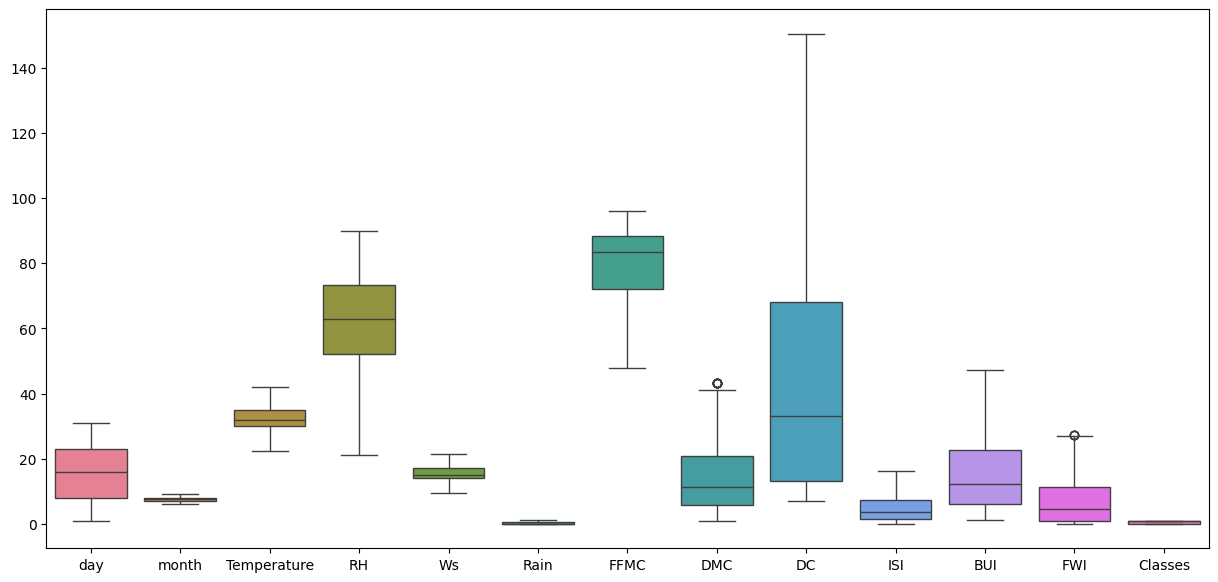

In [110]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df2,ax=ax)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 28.6 KB


In [112]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  
0  0.5        0  
1  0.4        0  
2  0.1        0  
3  0.0        0  
4  0.5        0

In [113]:
df['Temperature'].unique()

array([29, 26, 25, 27, 31, 33, 30, 28, 32, 34, 35, 36, 37, 22, 24, 38, 39,
       40, 42], dtype=int64)

In [114]:
df2.head()

day  month  Temperature    RH    Ws  Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  1.0    6.0         29.0  57.0  18.0  0.00  65.70  3.4   7.6  1.3  3.4  0.5   
1  2.0    6.0         29.0  61.0  13.0  1.25  64.40  4.1   7.6  1.0  3.9  0.4   
2  3.0    6.0         26.0  82.0  21.5  1.25  47.74  2.5   7.1  0.3  2.7  0.1   
3  4.0    6.0         25.0  89.0  13.0  1.25  47.74  1.3   6.9  0.0  1.7  0.0   
4  5.0    6.0         27.0  77.0  16.0  0.00  64.80  3.0  14.2  1.2  3.9  0.5   

   Classes  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

In [115]:
len(df['Classes'])

244

In [116]:
df2.to_csv('Model_ready_data.csv')